<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/first_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [ ]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=df.drop(columns=['Surname','RowNumber','CustomerId'])

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 11)

In [ ]:
df.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


## **Data Cleaning**

In [ ]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df.duplicated().sum()

0

## **Let's Visualize Data**

In [ ]:
##importing require library
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
num_var=[]
cat_var=[]

##numerical columns
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        num_var.append(i)

##categorical columns
for i in df.columns:
    if df[i].dtype == 'object':
        cat_var.append(i)

<Axes: >

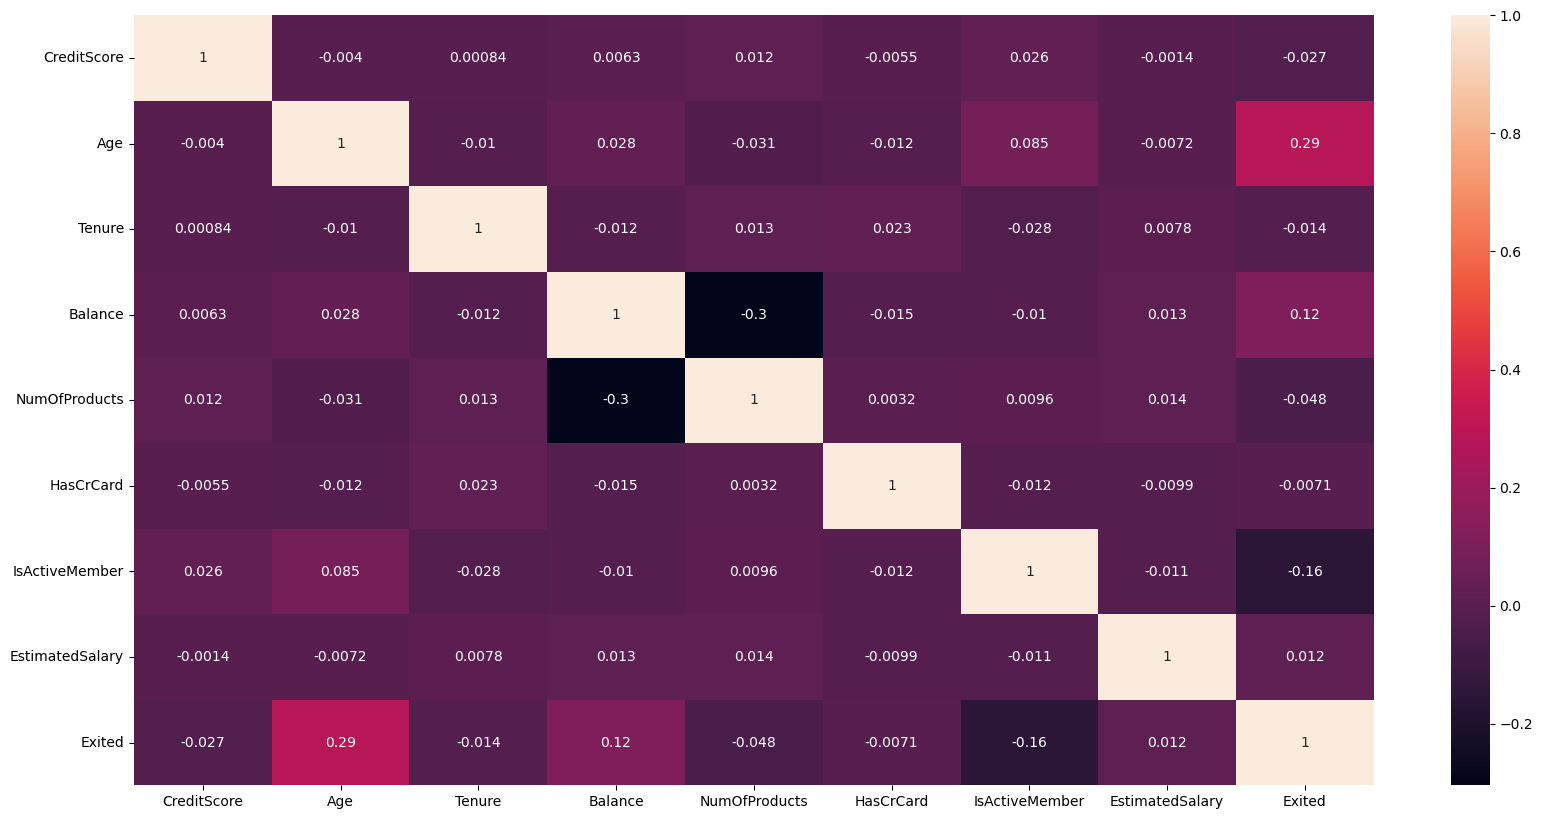

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df[num_var].corr(),annot=True)

In [ ]:
num_var

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

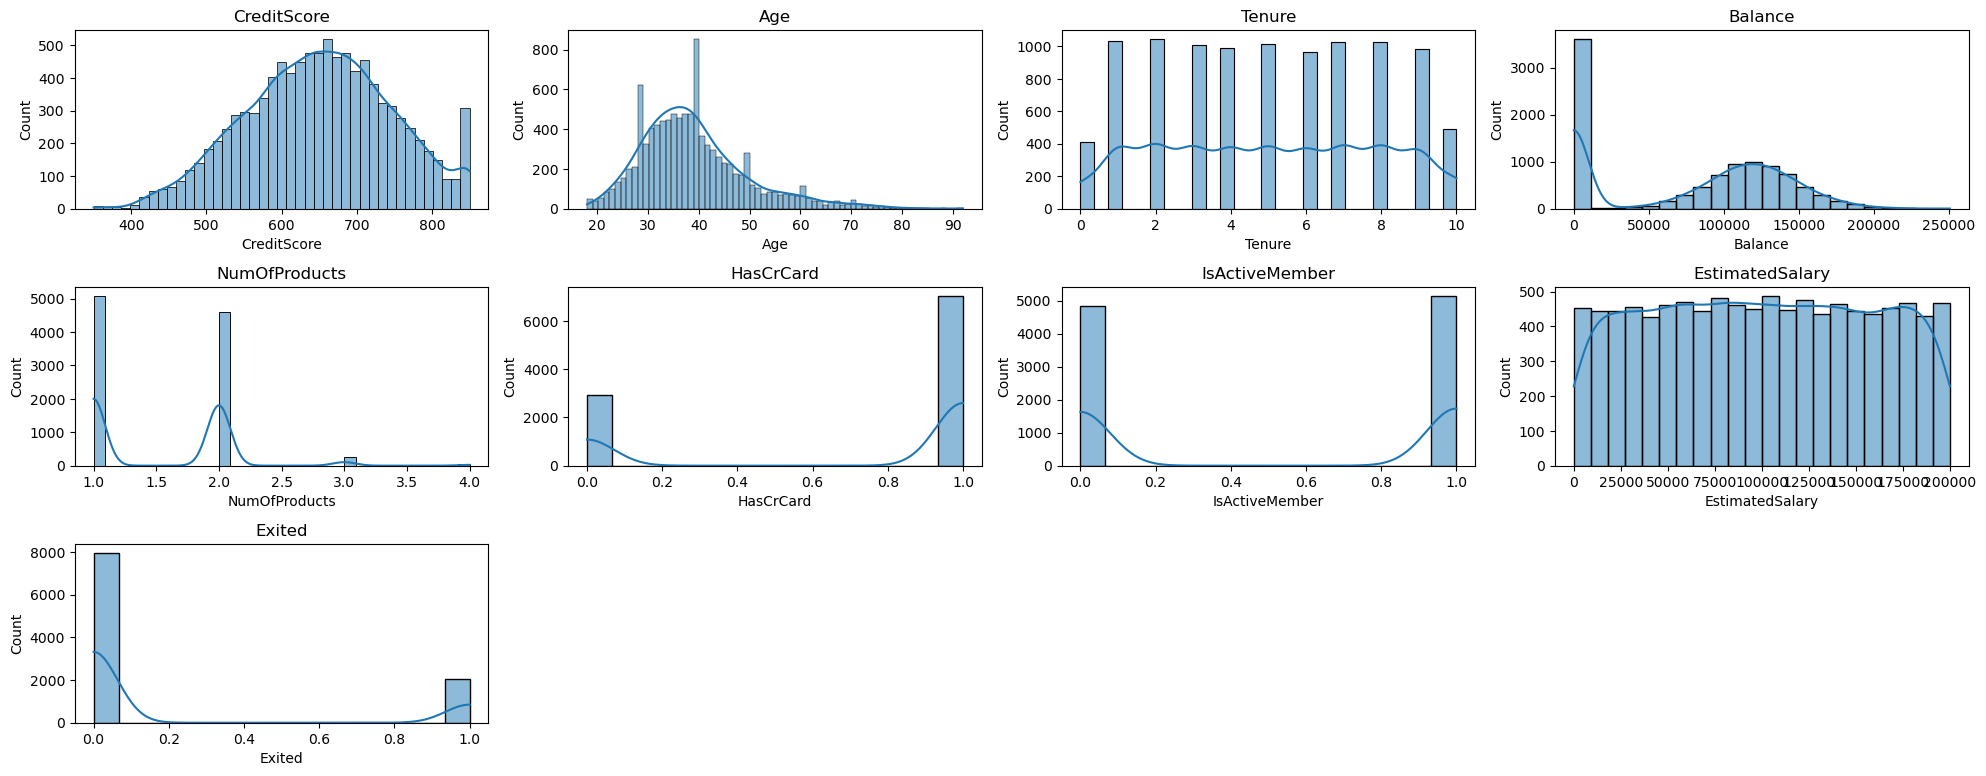

In [ ]:
plt.figure(figsize=(20,10))

for i , var in enumerate(df[num_var]):
    plt.subplot(4,4,i+1)
    sns.histplot(df[var],kde=True)
    plt.title(var)
plt.tight_layout()
plt.show()

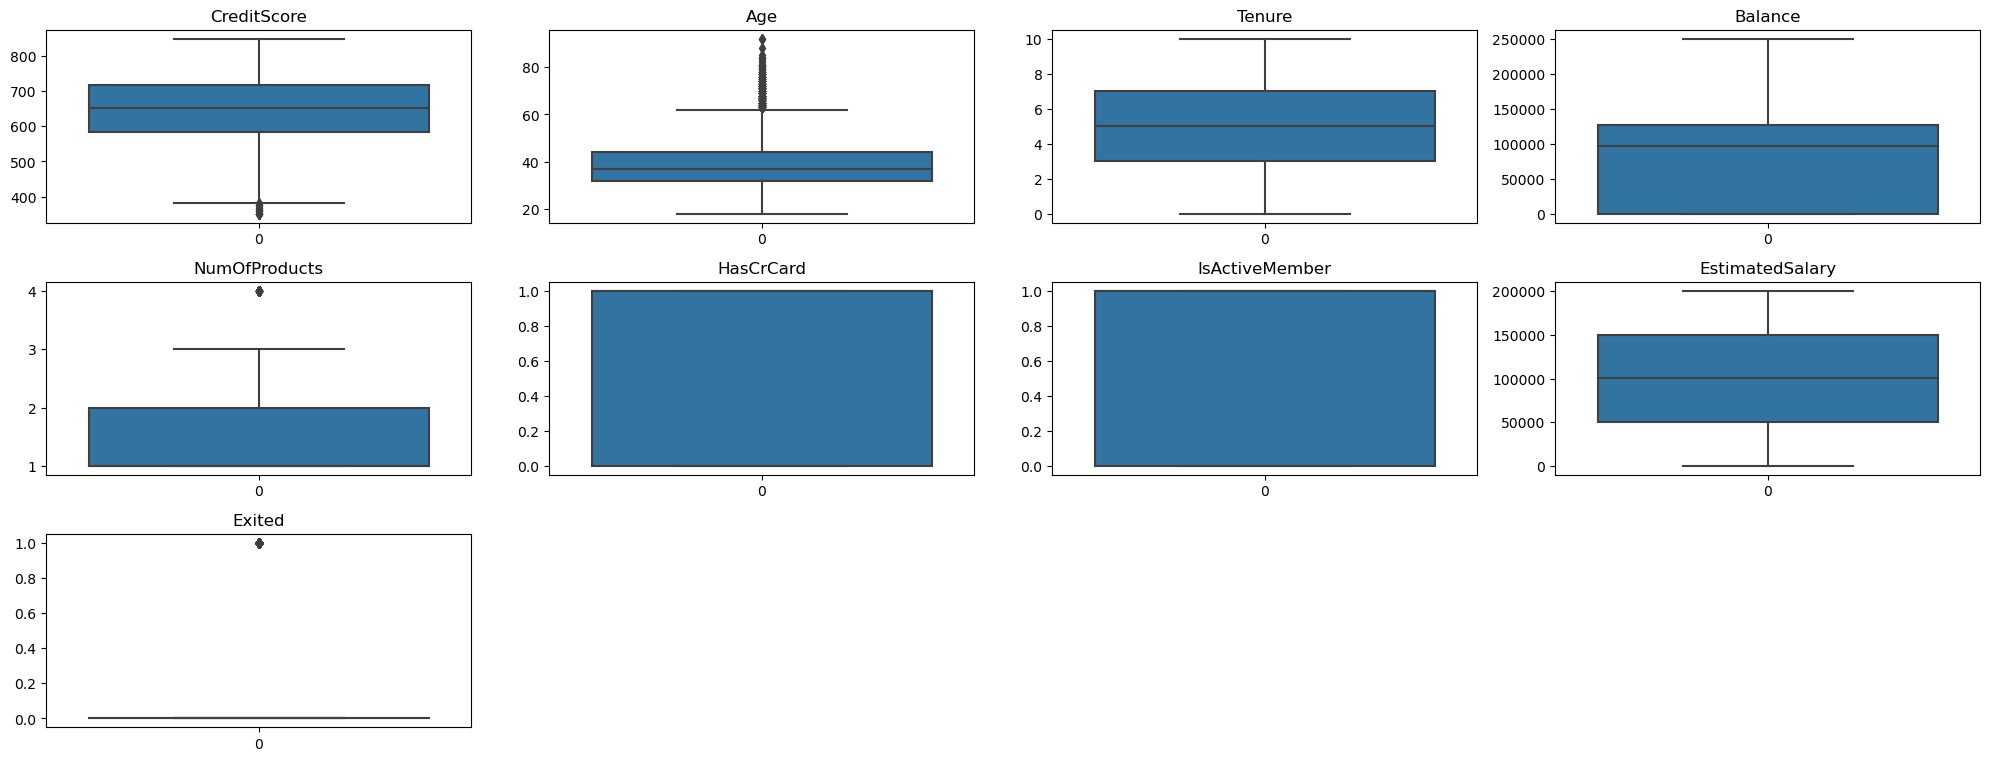

In [ ]:
plt.figure(figsize=(20,10))

for i , var in enumerate(df[num_var]):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[var])
    plt.title(var)

plt.tight_layout()
plt.show()

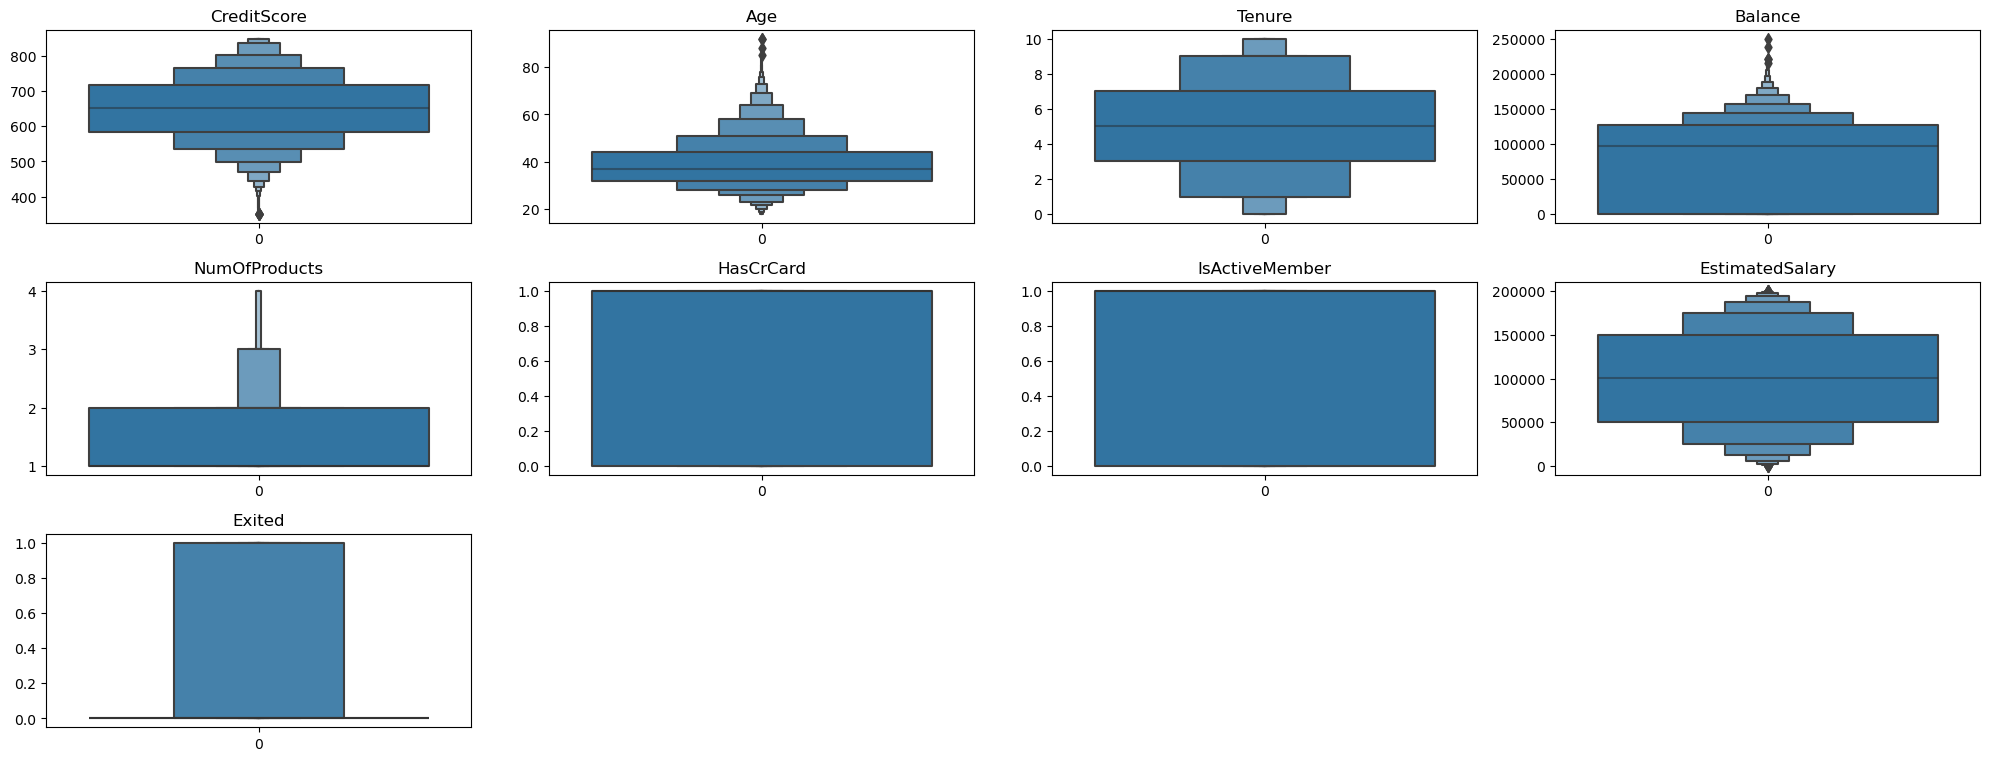

In [ ]:
plt.figure(figsize=(20,10))

for i , var in enumerate(df[num_var]):
    plt.subplot(4,4,i+1)
    sns.boxenplot(df[var])
    plt.title(var)

plt.tight_layout()
plt.show()

<Axes: >

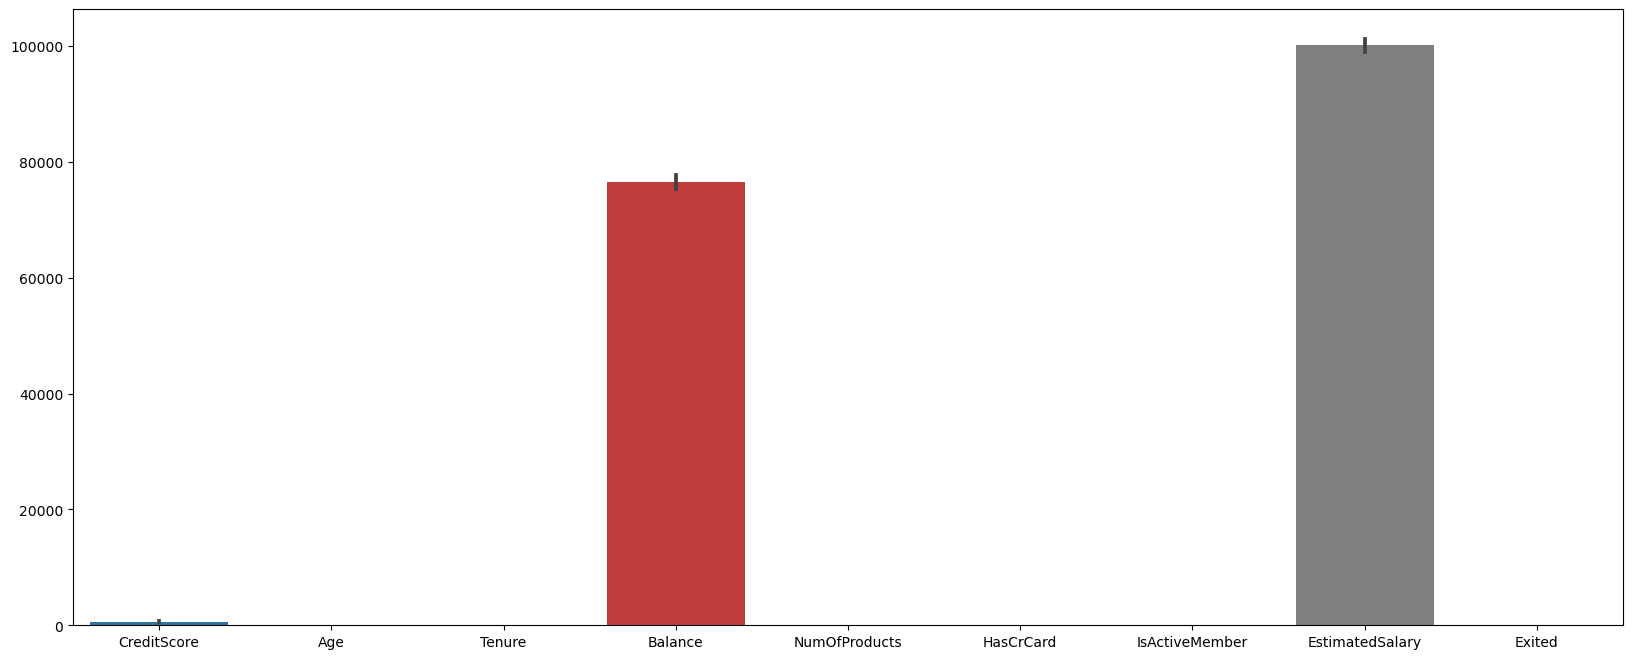

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(df)

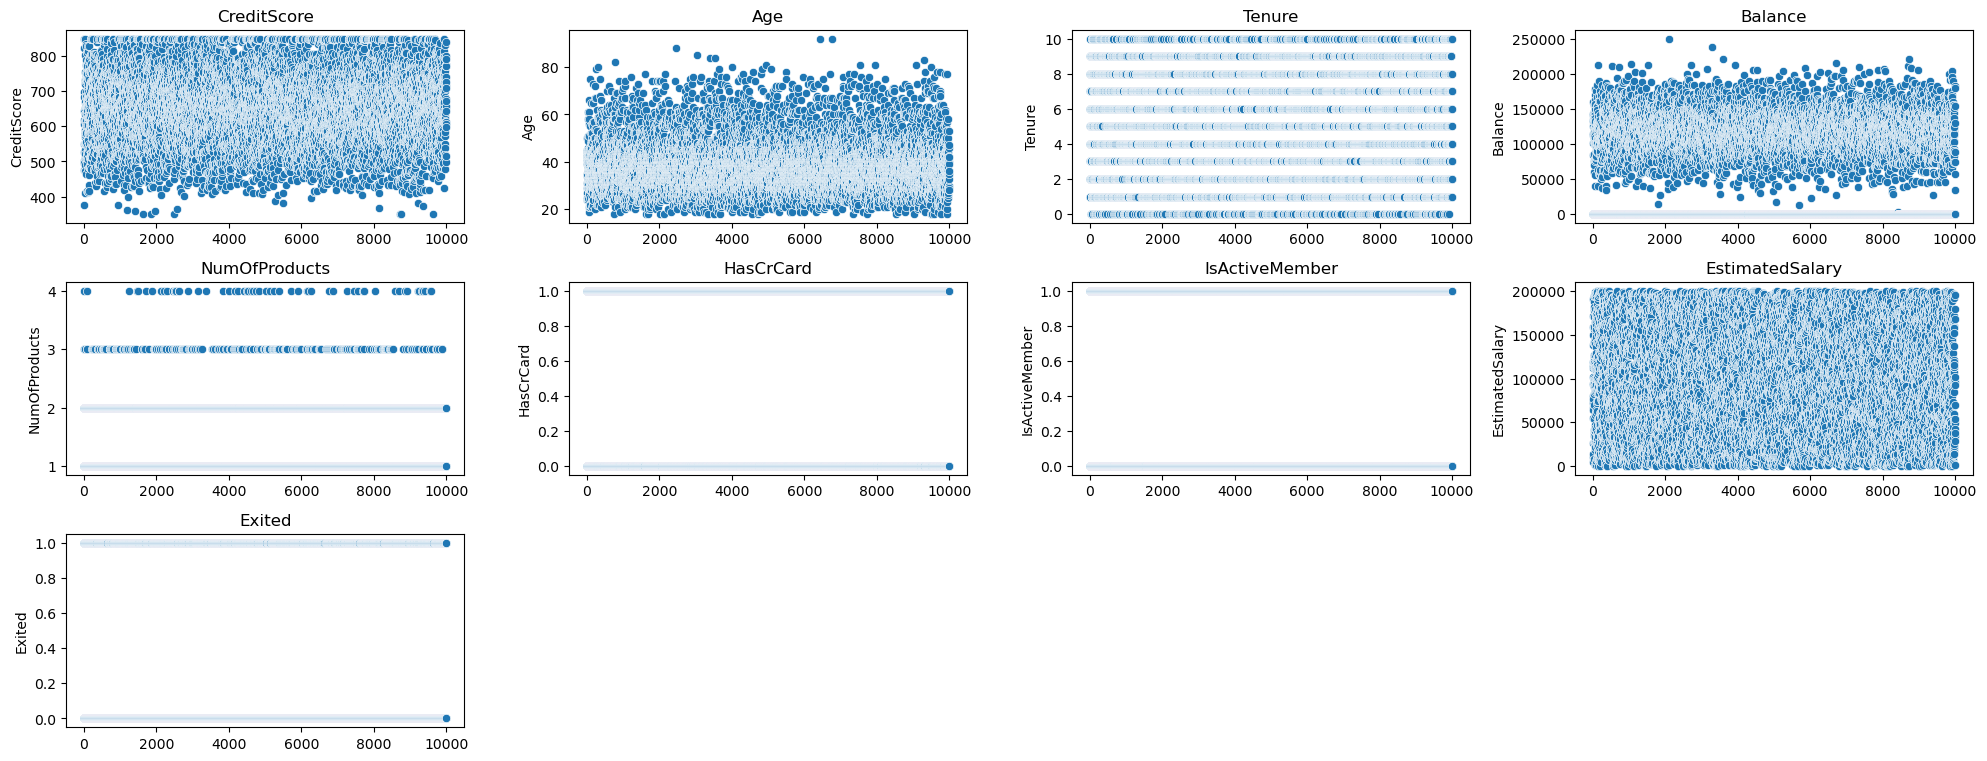

In [ ]:
plt.figure(figsize=(20,10))

for i , var in enumerate(df[num_var]):
    plt.subplot(4,4,i+1)
    sns.scatterplot(df[var])
    plt.title(var)

plt.tight_layout()
plt.show()

<Axes: >

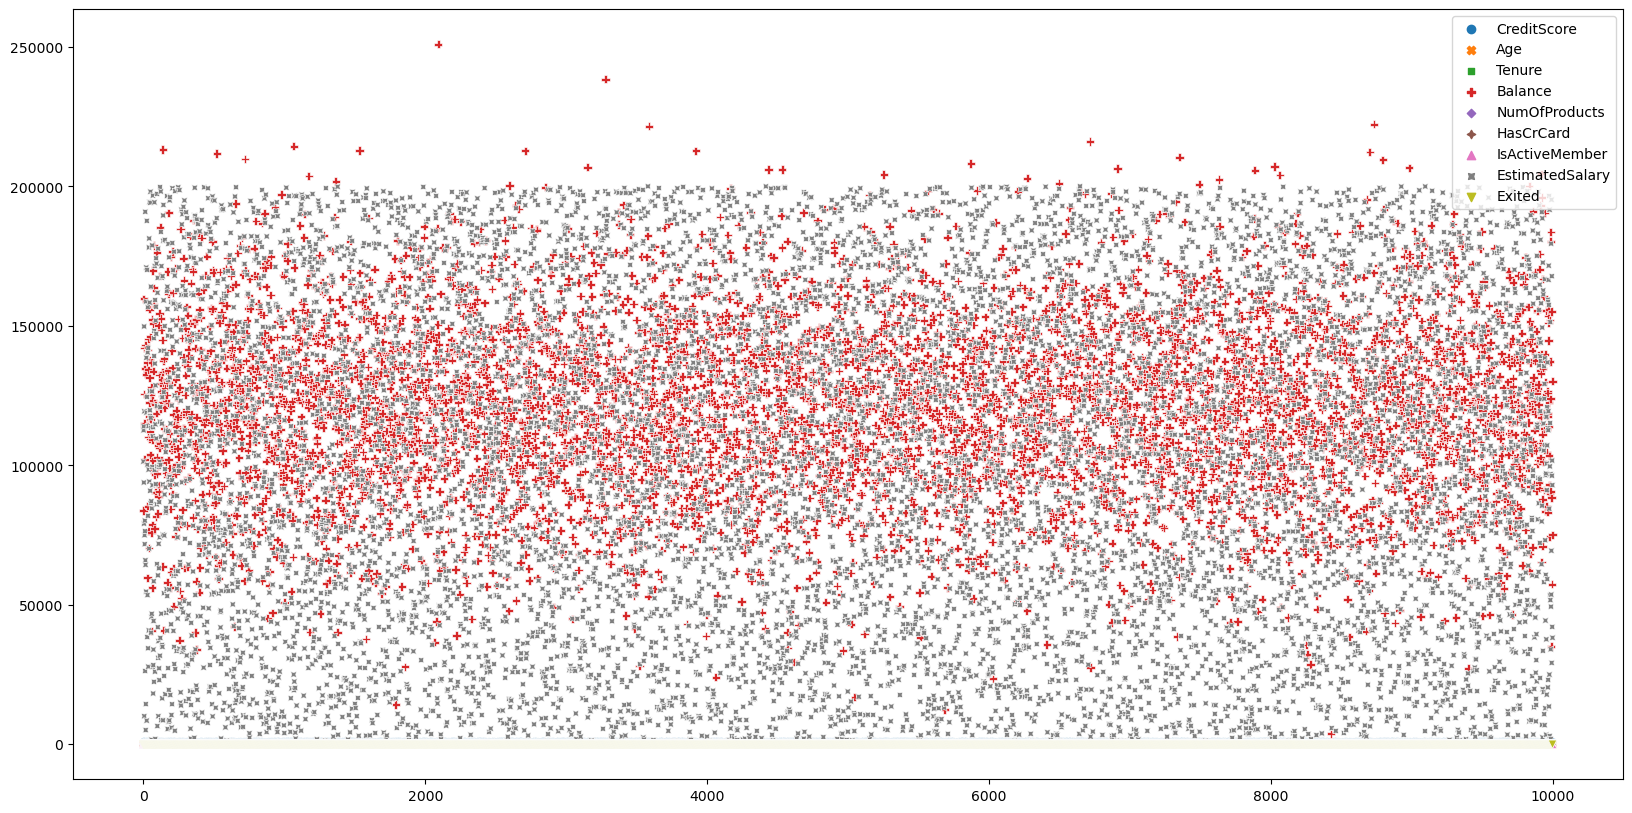

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(df)

Text(0.5, 1.0, 'Balance VS Exited Gender Wise')

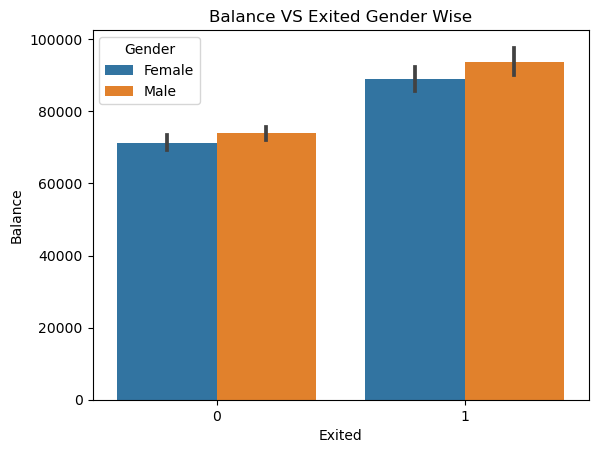

In [ ]:
sns.barplot(df,x='Exited',y='Balance',hue='Gender')
plt.title("Balance VS Exited Gender Wise")

Text(0.5, 1.0, 'EstimatedSalary VS Exited Gender Wise')

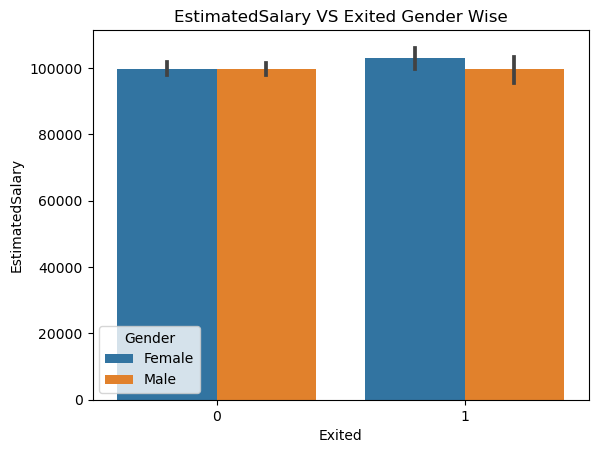

In [ ]:
sns.barplot(df,x='Exited',y='EstimatedSalary',hue='Gender')
plt.title("EstimatedSalary VS Exited Gender Wise")

## **Splitting the data and Feature Engineering**

In [ ]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
X=df.drop(columns='Exited')
y=df['Exited']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
stc=StandardScaler()

In [ ]:
tf1=ColumnTransformer(transformers=[
    ('sdtc',StandardScaler(),slice(0,None)),
],remainder="passthrough")

In [ ]:
X_train_scaled=tf1.fit_transform(X_train)
X_test_scaled=tf1.fit_transform(X_test)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [ ]:
model=Sequential()
model.add(layers.Dense(3,activation='sigmoid',input_dim=11))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'],)

In [ ]:
history=model.fit(X_train_scaled,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
175/175 [==============================] - 1s 3ms/step - loss: 0.5833 - accuracy: 0.7857 - val_loss: 0.5431 - val_accuracy: 0.7943
Epoch 2/20
175/175 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.7920 - val_loss: 0.5001 - val_accuracy: 0.7943
Epoch 3/20
175/175 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.7920 - val_loss: 0.4783 - val_accuracy: 0.7943
Epoch 4/20
175/175 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.7920 - val_loss: 0.4656 - val_accuracy: 0.7943
Epoch 5/20
175/175 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.7920 - val_loss: 0.4563 - val_accuracy: 0.7943
Epoch 6/20
175/175 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.7920 - val_loss: 0.4494 - val_accuracy: 0.7943
Epoch 7/20
175/175 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.7920 - val_loss: 0.4438 - val_accuracy: 0.7943
Epoch 

In [ ]:
model.layers[0].get_weights()

[array([[ 1.4784202e-01,  3.5689887e-02,  2.1189342e-01],
        [ 3.9595440e-01, -1.4907994e+00, -1.8178598e+00],
        [ 1.7571710e-01,  8.9863673e-02,  1.2553349e-01],
        [ 4.0082666e-01, -3.2813516e-01, -8.4591862e-03],
        [-1.4000660e-01,  2.0595801e-01,  9.9234814e-03],
        [ 8.0697522e-02,  5.0369225e-02,  7.0304036e-02],
        [-1.4133986e+00,  8.1197912e-01,  6.6677138e-02],
        [ 2.4038817e-01, -1.5546344e-03,  8.8070564e-02],
        [ 1.0781026e-01, -8.0330336e-01, -4.5651352e-01],
        [-3.7183639e-01, -1.6339040e-01, -2.1872300e-01],
        [-5.7288778e-01,  6.7161781e-01,  1.7960554e-01]], dtype=float32),
 array([-0.49755853,  0.5815554 ,  0.22640125], dtype=float32)]

In [ ]:
y_prob=model.predict(X_test_scaled)

94/94 [==============================] - 0s 1ms/step


In [ ]:
y_pred=y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.8053333333333333

Text(0.5, 1.0, 'Loss Curve')

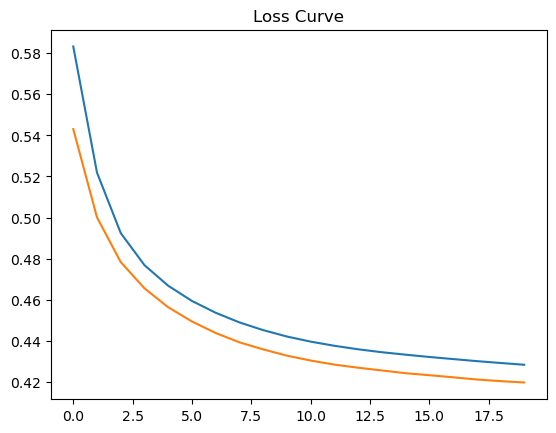

In [ ]:
sns.lineplot(history.history['loss'])
sns.lineplot(history.history['val_loss'])
plt.title("Loss Curve")

Text(0.5, 1.0, 'Accuracy Curve')

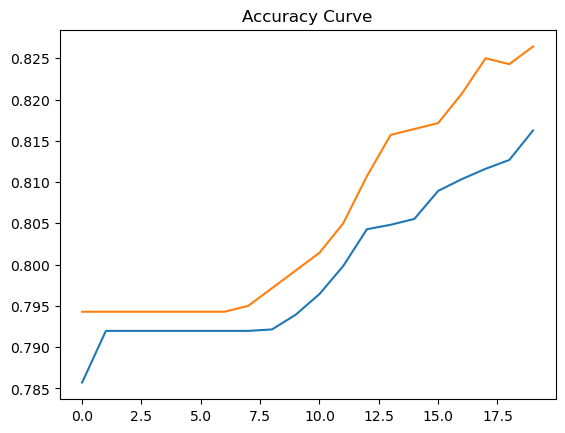

In [ ]:
sns.lineplot(history.history['accuracy'])
sns.lineplot(history.history['val_accuracy'])
plt.title("Accuracy Curve")

In [ ]:
X_test.iloc[0]

CreditScore            596.00
Age                     32.00
Tenure                   3.00
Balance              96709.07
NumOfProducts            2.00
HasCrCard                0.00
IsActiveMember           0.00
EstimatedSalary      41788.37
Geography_Germany        1.00
Geography_Spain          0.00
Gender_Male              1.00
Name: 6252, dtype: float64